## Support Vector Machine

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

color_list = ["", "red", "orange", "yellow", "green", "blue"]

### Read training/ test data as numpy.ndarray

In [3]:
X_train_np = np.genfromtxt("data/X_train.csv", delimiter=',')
T_train_np = np.genfromtxt("data/T_train.csv", delimiter=',')
X_test_np  = np.genfromtxt("data/X_test.csv",  delimiter=',')
T_test_np  = np.genfromtxt("data/T_test.csv",  delimiter=',')

### Read training/ test data as python list

In [9]:
with open("data/X_train.csv") as f:
    lines = f.readlines()
X_train = [[float(x) for x in line.strip().split(",")] for line in lines]

with open("data/T_train.csv") as f:
    lines = f.readlines()
T_train = [int(line.strip()) for line in lines]

with open("data/X_test.csv") as f:
    lines = f.readlines()
X_test = [[float(x) for x in line.strip().split(",")] for line in lines]

with open("data/T_test.csv") as f:
    lines = f.readlines()
T_test = [int(line.strip()) for line in lines]

### soft-margin SVM using scikit learn python library
sklearn.svm.SVC  
using default argument:
- panalty parameter C: 1.0
- kernel: rbf
- gamma: 1/n_feature

In [4]:
model = svm.SVC()
model.fit(X_train_np, T_train_np)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
model.score(X_test, T_test)

NameError: name 'X_test' is not defined

### grid search

In [43]:
gamma_default = 1.0 / len(X_train)
param_grid = {'kernel': ['rbf'],
              'C': [0.1, 0.5, 1.0, 1.5, 2.0, 10.0], 
              'gamma': [gamma_default/10, gamma_default/5, gamma_default/2, gamma_default, gamma_default*2, gamma_default*5, gamma_default*10]}

# param_grid = {'kernel': ['rbf'],
#               'C': [1.0, 2.0], 
#               'gamma': [gamma_default, gamma_default*2]}

In [ ]:
model_cv = GridSearchCV(svm.SVC(), param_grid, cv=5)
model_cv.fit(X_train_np, T_train_np)

In [24]:
model_cv.best_params_

{'C': 2.0, 'gamma': 0.0004, 'kernel': 'rbf'}

In [35]:
model = svm.SVC(C=2.0, gamma=0.0004)
model.fit(X_train_np, T_train_np)

SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0004, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
model.score(X_test, T_test)

0.95079999999999998

In [ ]:
T_train_predict = model.predict(X_train)

In [ ]:
decision_function = model.decision_function(X_train_np)

### use PCA to project training data onto 3D space
It's much easier to see clusters in 3D space than 2D space

In [6]:
pca_3d = PCA(n_components=3, copy=True)
X_train_3d = pca_3d.fit_transform(X_train_np)
x_3d, y_3d, z_3d = zip(*X_train_3d)

Plot support vectors with cross marker

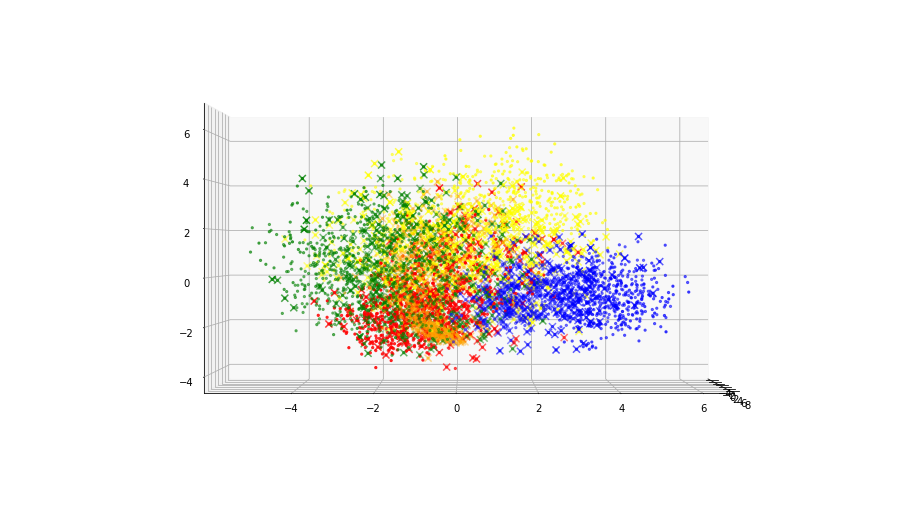

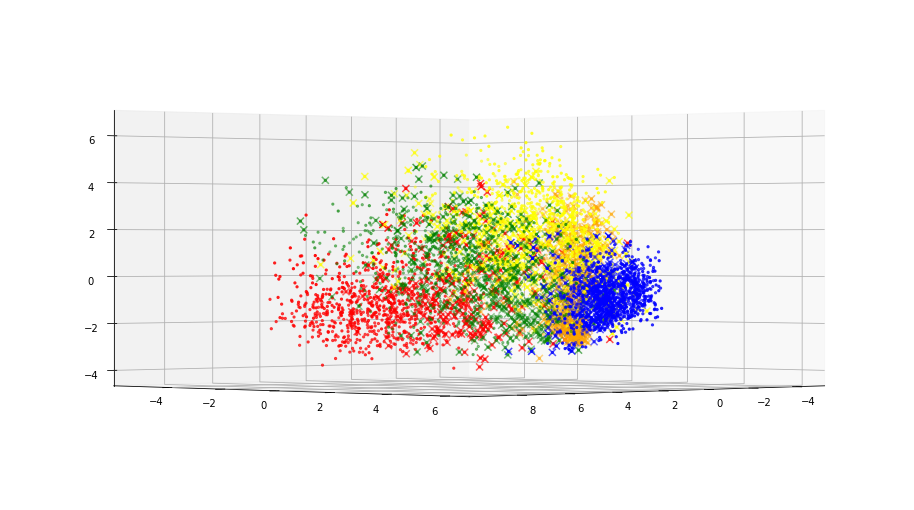

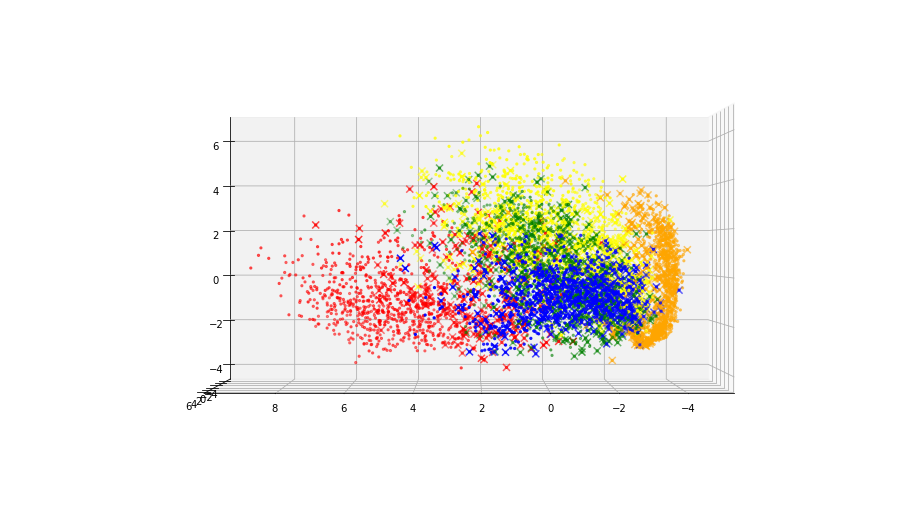

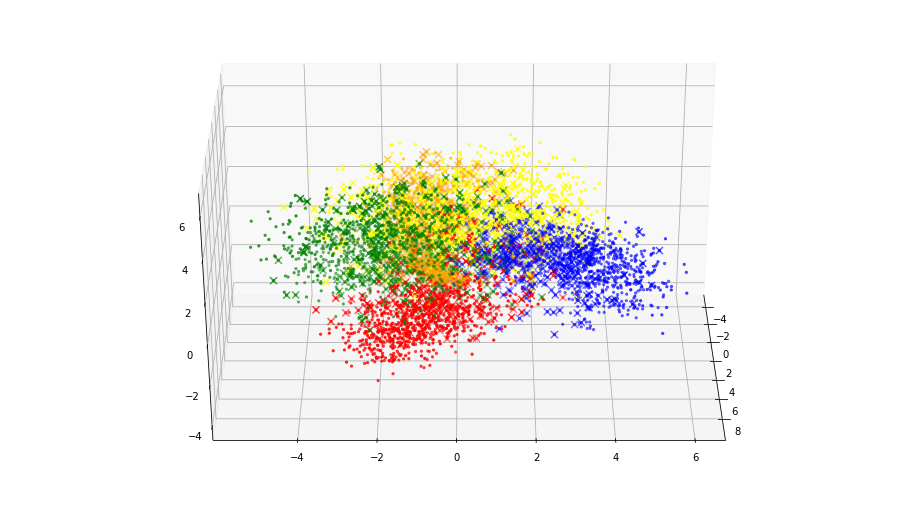

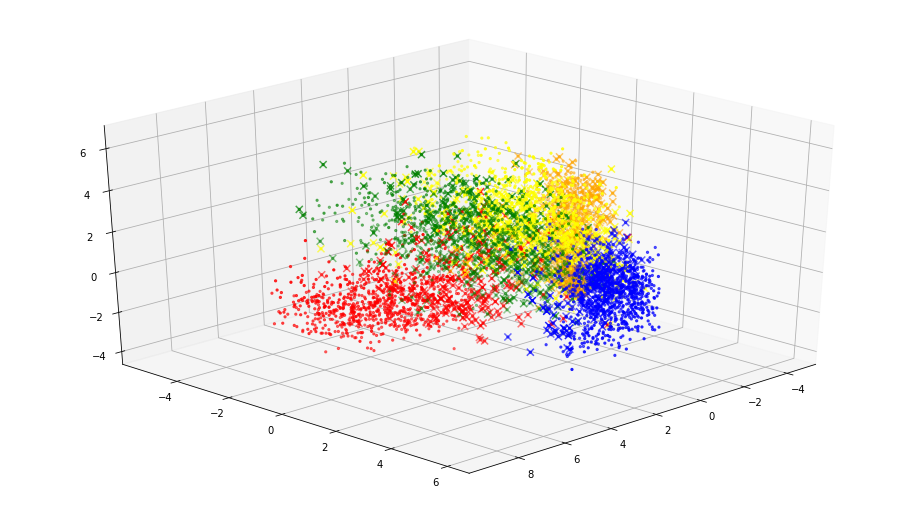

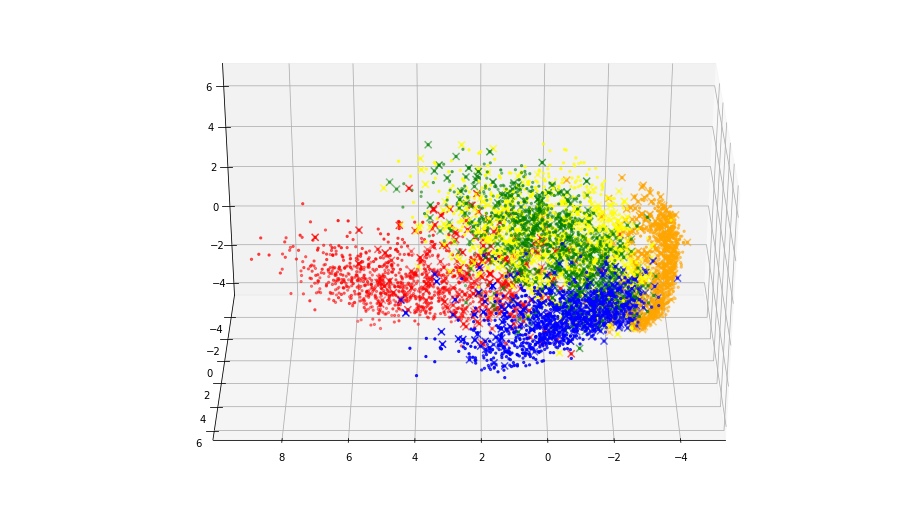

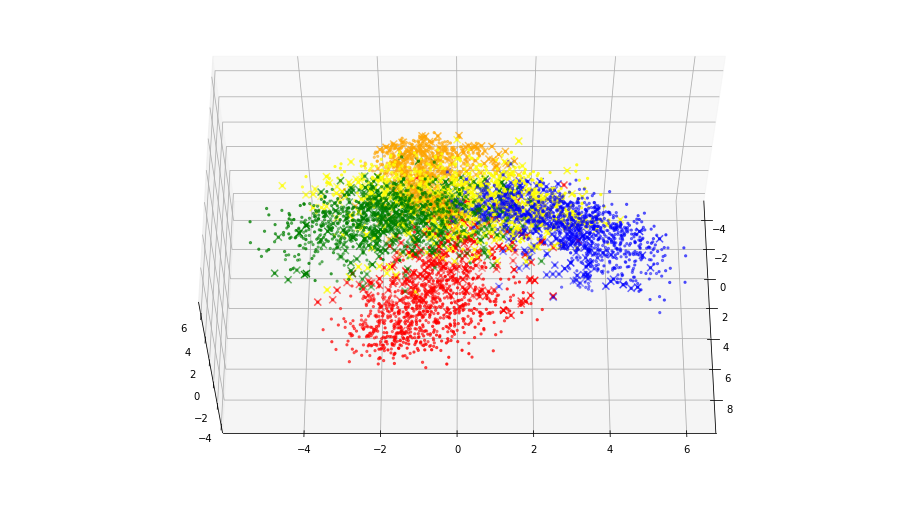

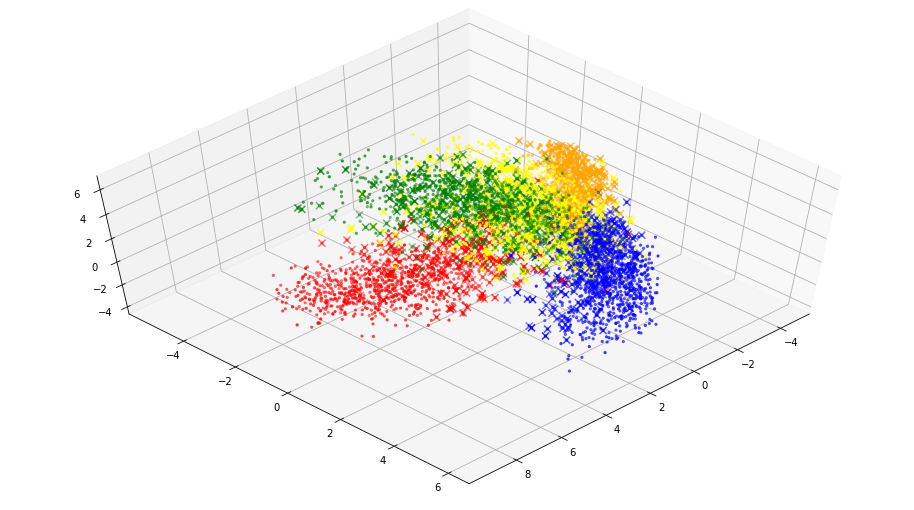

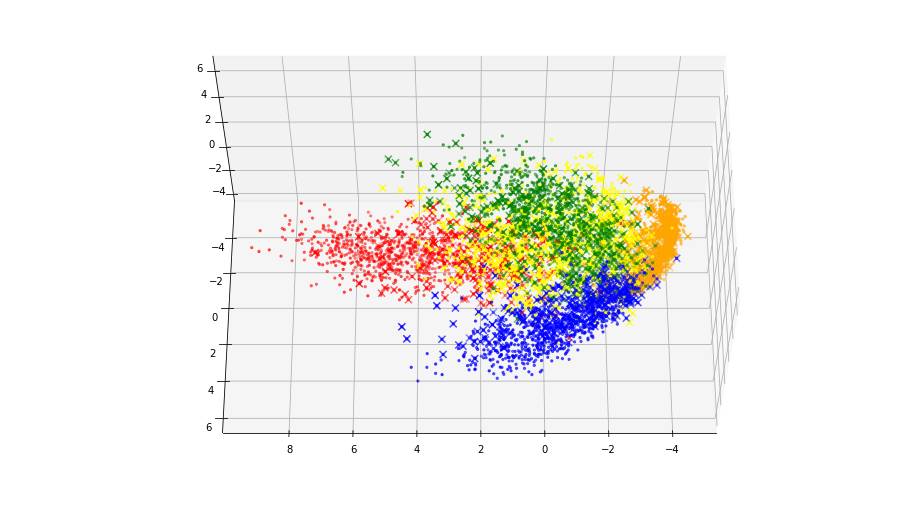

In [10]:
colors = [color_list[label] for label in T_train]
color_SVs = [colors[i] for i in model.support_]
size = [50 for i in range(len(color_SVs))]

x_SVs_3d = [x_3d[i] for i in model.support_]
y_SVs_3d = [y_3d[i] for i in model.support_]
z_SVs_3d = [z_3d[i] for i in model.support_]

# fig = plt.figure(figsize=(16, 9))
# ax = fig.add_subplot(1,1,1, projection='3d')
# ax.view_init(45, 45)
# ax.scatter(x_3d, y_3d, z_3d, color=colors, marker='.')
# ax.scatter(x_SVs_3d, y_SVs_3d, z_SVs_3d, color=color_SVs, marker='x', s=size)

for i in [0, 30, 60]:
    for j in [0, 45, 90]:
        fig = plt.figure(figsize=(16, 9))
        ax = fig.add_subplot(1,1,1, projection='3d')
        ax.view_init(i, j)
        ax.scatter(x_3d, y_3d, z_3d, color=colors, marker='.')
        ax.scatter(x_SVs_3d, y_SVs_3d, z_SVs_3d, color=color_SVs, marker='x', s=size)

plt.show()

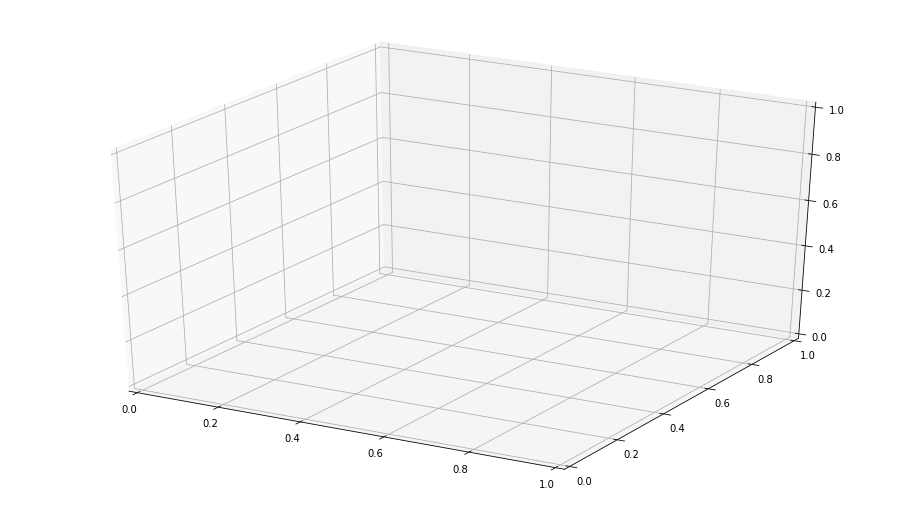

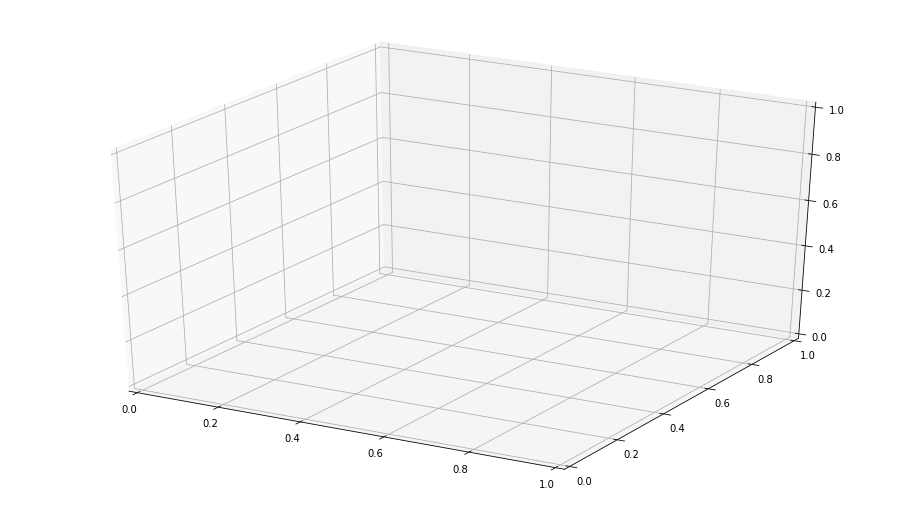

/usr/local/lib/python2.7/dist-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


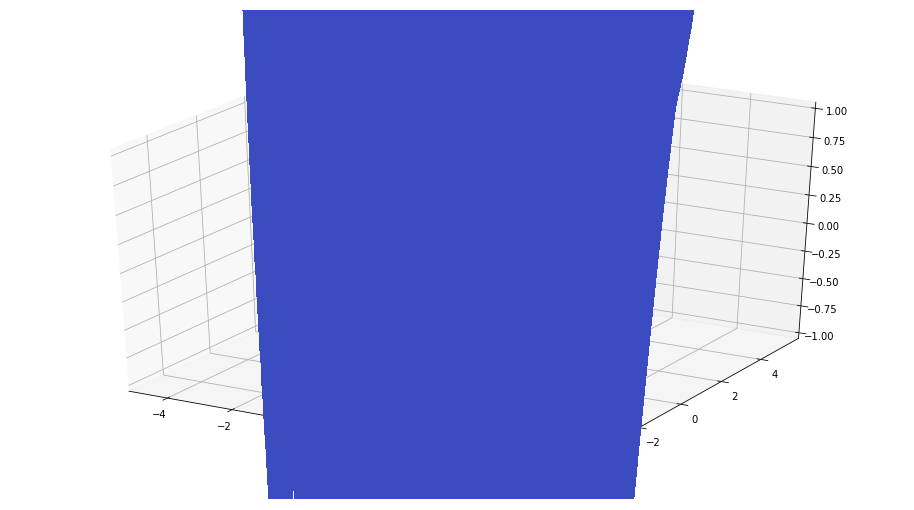

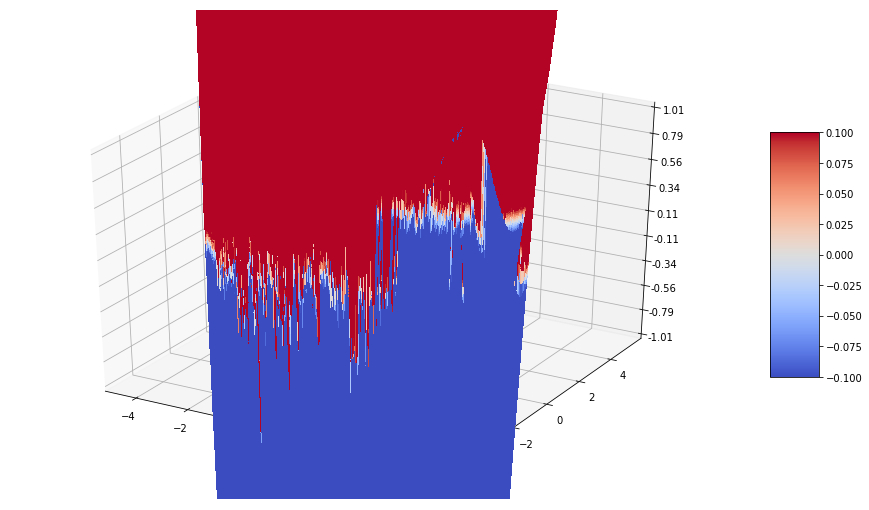

In [14]:
import pandas as pd
from scipy.interpolate import griddata
from matplotlib.ticker import LinearLocator, FormatStrFormatter

xyz = {'x': x_SVs_3d, 'y': y_SVs_3d, 'z': z_SVs_3d}
# put the data into a pandas DataFrame (this is what my data looks like)
# df = pd.DataFrame(xyz, index=range(len(xyz['x']))) 

# re-create the 2D-arrays
x1 = np.linspace(np.min(x_SVs_3d), np.max(x_SVs_3d), len(x_SVs_3d))
y1 = np.linspace(np.min(y_SVs_3d), np.max(y_SVs_3d), len(y_SVs_3d))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((x_SVs_3d, y_SVs_3d), z_SVs_3d, (x2, y2), method='cubic')

fig = plt.figure(figsize=(16, 9))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### use PCA to project training data onto 2D space
Homework requirement  
Use Voronoi diagram generated from 1-nearset neighbor as visualization of decision boundary

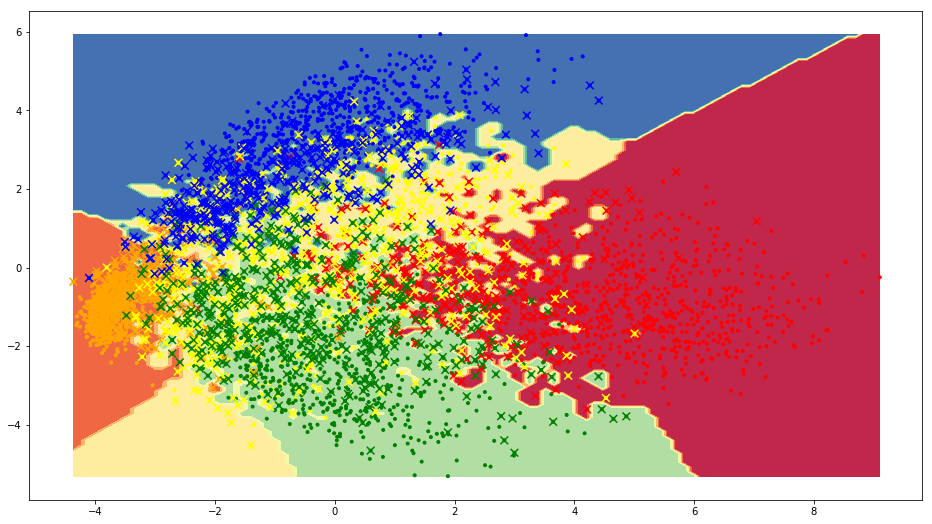

In [42]:
colors = [color_list[label] for label in T_train]
color_SVs = [colors[i] for i in model.support_]
size = [60 for i in range(len(color_SVs))]

pca_2d = PCA(n_components=2, copy=True)
X_train_2d = pca_2d.fit_transform(X_train_np)
x_2d, y_2d = zip(*X_train_2d)

x_SVs_2d = [x_2d[i] for i in model.support_]
y_SVs_2d = [y_2d[i] for i in model.support_]

fig = plt.figure(figsize=(16, 9))

resolution = 100 # 100x100 background pixels
X2d_xmin, X2d_xmax = np.min(X_train_2d[:,0]), np.max(X_train_2d[:,0])
X2d_ymin, X2d_ymax = np.min(X_train_2d[:,1]), np.max(X_train_2d[:,1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# approximate Voronoi tesselation on resolution x resolution grid using 1-NN
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_train_2d, T_train_predict) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))
 
plt.contourf(xx, yy, voronoiBackground, cmap=plt.cm.Spectral)

plt.scatter(x_2d, y_2d, color=colors, marker='.')
plt.scatter(x_SVs_2d, y_SVs_2d, color=color_SVs, marker='x', s=size)

plt.show()

### ICA
To compare with pca

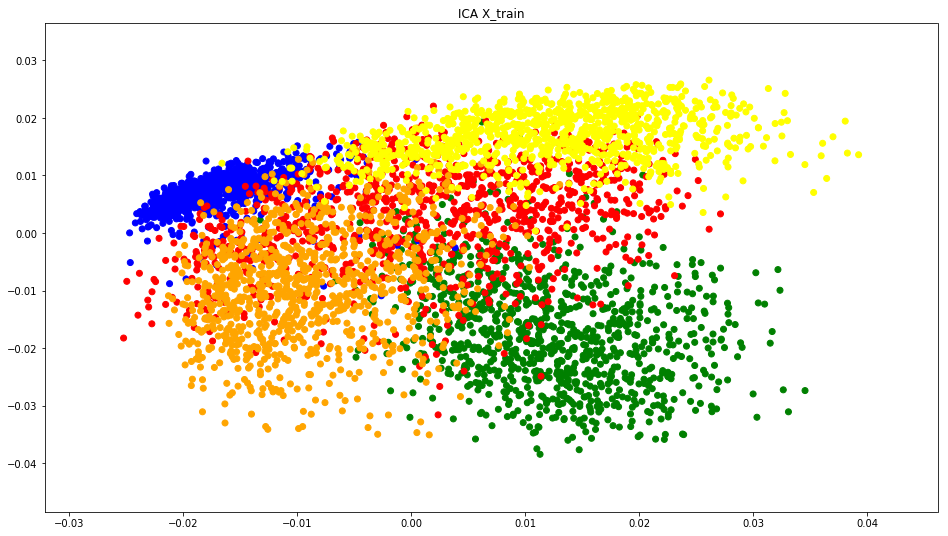

In [13]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2)
X_train_ica_2d = ica.fit_transform(X_train)

x_ica_2d, y_ica_2d = zip(*X_train_ica_2d)

plt.figure(figsize=(16, 9))
plt.title("ICA X_train")
plt.scatter(x_ica_2d, y_ica_2d, color=colors)

plt.show()

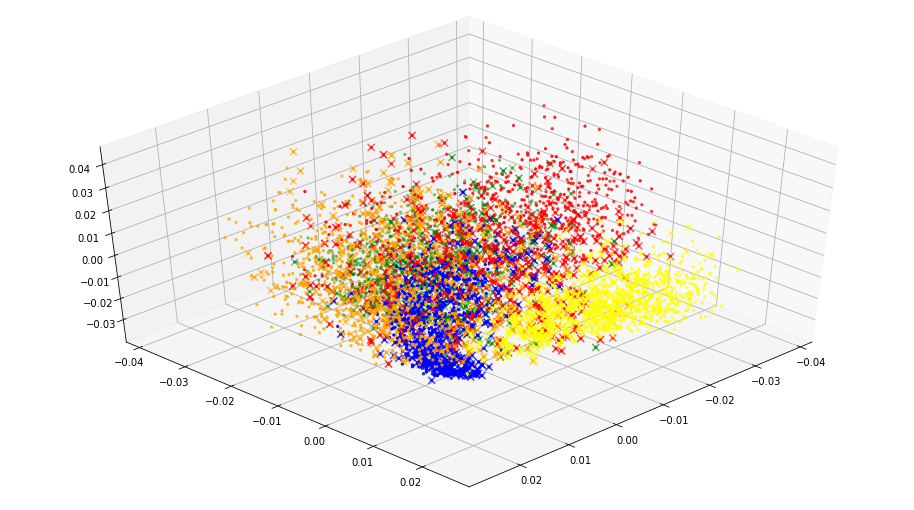

In [14]:
ica = FastICA(n_components=3)
X_train_ica_3d = ica.fit_transform(X_train)

x_ica_3d, y_ica_3d, z_ica_3d = zip(*X_train_ica_3d)

x_SVs_ica_3d = [x_ica_3d[i] for i in clf.support_]
y_SVs_ica_3d = [y_ica_3d[i] for i in clf.support_]
z_SVs_ica_3d = [z_ica_3d[i] for i in clf.support_]

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.view_init(45, 45)
ax.scatter(x_ica_3d, y_ica_3d, z_ica_3d, color=colors, marker='.')
ax.scatter(x_SVs_ica_3d, y_SVs_ica_3d, z_SVs_ica_3d, color=color_SVs, marker='x', s=size)

plt.show()